In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE


In [20]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_fourier_z = pd.read_csv(os.path.join(folder_path, "features_fourier_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_fourier_mm = pd.read_csv(os.path.join(folder_path, "features_fourier_all_minmax.csv"))

In [21]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_z_cl= df_fourier_z.drop(columns=['filename', 'label'])

In [22]:
df_fourier_z_cl

,mean_magnitude,std_magnitude,low_freq_magnitude,high_freq_magnitude
0,-0.675069,-0.789859,-0.897021,-1.099034
1,-0.332674,0.421457,-0.087640,0.128736
2,-0.726203,-1.157138,-0.882415,-0.876548
3,-0.624806,-0.816866,-0.490506,-0.490618
4,-1.317448,-1.644363,-1.428906,-1.326237
...,...,...,...,...
532,0.749086,0.945783,0.887860,0.885922
533,0.989613,0.780056,1.338128,1.304986
534,0.873905,0.820400,0.651903,0.660034
535,0.896289,1.520130,0.721742,1.004862


In [23]:
bandwidth_values = [0.1, 0.2, 0.3, 0.4, 1.0, 1.3, 1.33]

for bw in bandwidth_values:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(df_fourier_z_cl.values)
    labels = ms.labels_
    n_clusters = len(np.unique(labels))
    
    if n_clusters > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_fourier_z_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.10 | Clusters: 470 | Silhouette Score: 0.094
Bandwidth: 0.20 | Clusters: 217 | Silhouette Score: 0.226
Bandwidth: 0.30 | Clusters: 87 | Silhouette Score: 0.224
Bandwidth: 0.40 | Clusters: 42 | Silhouette Score: 0.255
Bandwidth: 1.00 | Clusters: 4 | Silhouette Score: 0.421
Bandwidth: 1.30 | Clusters: 2 | Silhouette Score: 0.523
Bandwidth: 1.33 | Clusters: 2 | Silhouette Score: 0.520


In [24]:
bandwidth = 1.33
meanshift_z = MeanShift(bandwidth=bandwidth)
meanshift_z.fit(df_fourier_z_cl)

MeanShift(bandwidth=1.33)

In [25]:
tsne_z = TSNE(n_components=2, random_state=42)
X_tsne_z = tsne_z.fit_transform(df_fourier_z_cl.values)

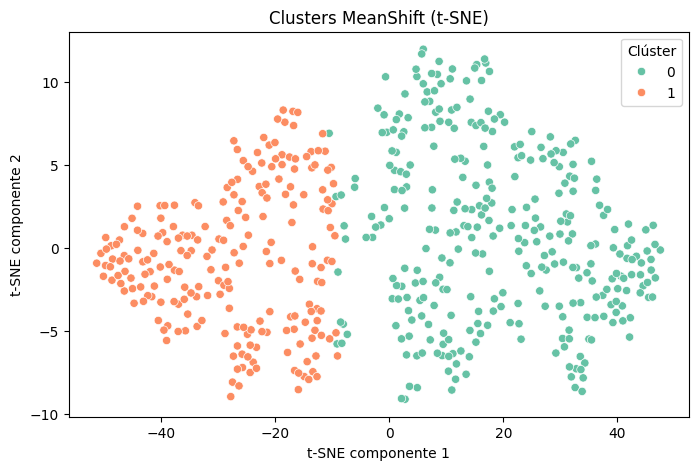

          filename    label  cluster
0      callo_1.png  smaller        1
1     callo_10.png  smaller        0
2    callo_100.png  smaller        1
3    callo_101.png  smaller        1
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        0
533   callo_96.png   higher        0
534   callo_97.png   higher        0
535   callo_98.png   higher        0
536   callo_99.png   higher        0

[537 rows x 3 columns]


In [26]:
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_z[:, 0], y=X_tsne_z[:, 1], hue=labels, palette='Set2')
plt.title('Clusters MeanShift (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_fourier_z['filename'],
    'label': df_fourier_z['label'],
    'cluster': labels
})

# Mostrar primeras filas
print(df_resultado)

In [27]:
score_z = silhouette_score(df_fourier_z_cl, labels)
print(f"Silhouette Score: {score_z:.3f}")

Silhouette Score: 0.520


se hace lo mismo con normalizacion min-max:

In [28]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_mm_cl= df_fourier_mm.drop(columns=['filename', 'label'])

In [29]:
bandwidth_values = [0.1, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26]

for bw in bandwidth_values:
    ms_mm = MeanShift(bandwidth=bw, bin_seeding=True)
    ms_mm.fit(df_fourier_mm_cl.values)
    labels = ms_mm.labels_
    n_clusters_mm = len(np.unique(labels))
    
    if n_clusters_mm > 1:  # Solo tiene sentido calcular Silhouette si hay más de 1 clúster
        score = silhouette_score(df_fourier_mm_cl.values, labels)
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: {score:.3f}")
    else:
        print(f"Bandwidth: {bw:.2f} | Clusters: {n_clusters} | Silhouette Score: N/A (solo 1 clúster)")

Bandwidth: 0.10 | Clusters: 2 | Silhouette Score: 0.259
Bandwidth: 0.20 | Clusters: 2 | Silhouette Score: 0.442
Bandwidth: 0.21 | Clusters: 2 | Silhouette Score: 0.443
Bandwidth: 0.22 | Clusters: 2 | Silhouette Score: 0.521
Bandwidth: 0.23 | Clusters: 2 | Silhouette Score: 0.523
Bandwidth: 0.24 | Clusters: 2 | Silhouette Score: 0.524
Bandwidth: 0.25 | Clusters: 2 | Silhouette Score: 0.526
Bandwidth: 0.26 | Clusters: 2 | Silhouette Score: 0.523


In [30]:
bandwidth = 0.25
meanshift_mm = MeanShift(bandwidth=bandwidth)
meanshift_mm.fit(df_fourier_mm_cl)

MeanShift(bandwidth=0.25)

In [31]:
tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_fourier_mm_cl.values)

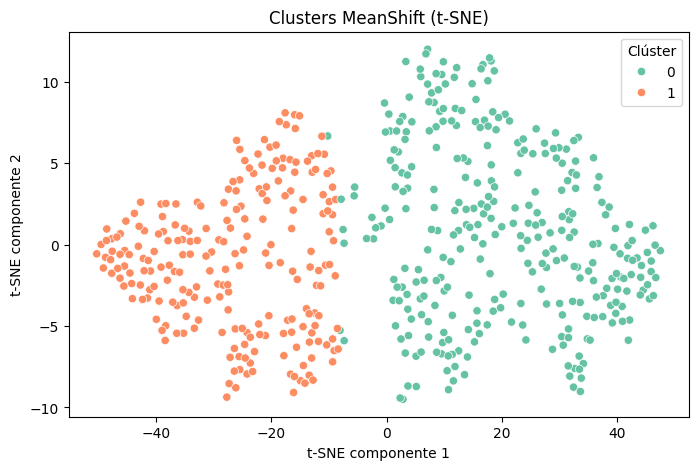

          filename    label  cluster
0      callo_1.png  smaller        1
1     callo_10.png  smaller        0
2    callo_100.png  smaller        1
3    callo_101.png  smaller        1
4    callo_102.png  smaller        1
..             ...      ...      ...
532   callo_95.png   higher        0
533   callo_96.png   higher        0
534   callo_97.png   higher        0
535   callo_98.png   higher        0
536   callo_99.png   higher        0

[537 rows x 3 columns]


In [32]:
# Visualización con Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=labels, palette='Set2')
plt.title('Clusters MeanShift (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

# Guardar resultados en DataFrame
df_resultado = pd.DataFrame({
    'filename': df_fourier_z['filename'],
    'label': df_fourier_z['label'],
    'cluster': labels
})

# Mostrar primeras filas
print(df_resultado)

In [33]:
score_mm = silhouette_score(df_fourier_mm_cl, labels)
print(f"Silhouette Score: {score_mm:.3f}")

Silhouette Score: 0.523
